In [1]:
import numpy as np
import pandas as pd
import math
from PIL import Image
import operator
import matplotlib.pyplot as plt
import random
from collections import OrderedDict

In [2]:
def func_x(x):
    ans = ((x**2)*math.sin(2*math.pi*x)) + 0.7
    return ans

In [3]:
def data_generator(n):
    
    data = np.zeros((100,3))
   
    x_c0 = []
    y_c0 = []
    x_c1 = []
    y_c1 = []
    for i in range(n):
        x = random.uniform(0,1)
        y = random.uniform(0,1)
        data[i][0] = x
        data[i][1] = y
        if(func_x(x) > y):
            x_c0.append(x)
            y_c0.append(y)
            data[i][2] = 0
        else:
            x_c1.append(x)
            y_c1.append(y)
            data[i][2] = 1
    
    return x_c0,y_c0,x_c1,y_c1,data

In [4]:
def data_generator_v(n):
    
    data = np.zeros((n,3))
   
    for i in range(n):
        x = random.uniform(0,1)
        y = random.uniform(0,1)
        data[i][0] = x
        data[i][1] = y
        if(func_x(x) > y):
            data[i][2] = 0
        else:
            data[i][2] = 1
    
    return data

In [5]:
def sigmoid(z):
    ans = 1/(1 + (np.exp(-z)))
    return ans

In [6]:
def weight(curr, next_nodes):
    #np.random.uniform(low = -0.3, high = 0.3, size=(next_nodes, curr))
    #
    return np.random.rand(next_nodes,curr)

In [7]:
def delta_matrix(w):
    d = []
    for i in range(len(w)):
        temp_w = w[i]
        row = len(temp_w)
        col = len(temp_w[0])
        d.append(np.zeros((row,col)))
    return d

In [8]:
def lamda_matrix(w, lam):
    l = []
    for i in range(len(w)):
        temp_w = w[i]
        row = len(temp_w)
        col = len(temp_w[0])
        lamda = lam * np.ones((row,col))
        for i in range(row):
            lamda[i][0] = 0
        l.append(lamda)
    return l

In [9]:
def forward_prop(x,w):
    z = w @ x
    a = sigmoid(z)
    return a

In [10]:
def weights_list(l_nodes):
    W = []
    for i in range(len(l_nodes) - 1):
        temp = weight(l_nodes[i] + 1, l_nodes[i+1])
        W.append(temp)
    return W

In [11]:
def full_forward_prop(w, x1, x2):
    a = []
    a_t = []
    l1 = np.array([1,x1, x2])
    
    a.append(l1)
    for i in range(len(w)):
        a_temp = forward_prop(a[i], w[i])
        if( i != (len(w) - 1)):
            a_temp = np.insert(a_temp, 0, 1)
        a.append(a_temp)
        
    return a

In [12]:
def output(x1,x2,w):
    a = full_forward_prop(w, x1, x2)
    
    return a[len(a)-1]

In [13]:
def prediction(h):
    if( h >= 0.5):
        return 1
    else:
        return 0

In [14]:
def error_calc(w, a, prev_e):
    e = np. delete((np.transpose(w) * (prev_e) * ((a) @ (1-a))),0,0)
    return e 

In [15]:
def errors(a,w,y,p):
    e = [] 
    f_e = p-y
    e.append(f_e)
    for i in range(len(w)-1):
        curr_w = w[len(w)-1-i]
        curr_a = a[i+1]
        pre_e = e[i]
        temp_e = error_calc(curr_w, curr_a, pre_e)
        e.append(temp_e)
    return e
    

In [16]:
def small_delta(d, a, e):
    d = d + (e * np.transpose(a))
    return d

In [17]:
def s_gradient(delt ,act ,er):
    s_g = []
    for i in range(len(er)):
        t_d = delt[i]
        t_a = act[i]
        t_e = er[len(er)-1-i]
        t2_d = small_delta(t_d, t_a, t_e)
        s_g.append(t2_d)
    return s_g

In [18]:
def reg_gradient(d, w , n, l):
    r_g = []
    for i in range(len(w)):
        t_r_g = ((1/n) * d[i]) + (l[i] * w[i])
        r_g.append(t_r_g)
    return r_g

In [19]:
def update_weight(w,grad, alpha):
    new_w = []
    for i in range(len(w)):
        temp_w = w[i]
        temp_grad = grad[i]
        n_w = temp_w - (alpha * temp_grad)
        new_w.append(n_w)
        
    return new_w
    

In [51]:
def StepCheck(arr):
    norms = []
    for w in arr:
        x = np.linalg.norm(w)
        norms.append(x)
    return sum(norms) / len(arr)

In [52]:
def GD(data,w, alpha, epoch, lamda, max_iter):
    prev_step_size = StepCheck(w)
    curr_iter = 0
    next_w = w
    r = len(data)
    
    while prev_step_size > epoch and curr_iter < max_iter:
        for i in range(r):
            #w = next_w
            
            #activations
            activations = full_forward_prop(w, data[i][0], data[i][1])
            
            #prediction
            pred = prediction(activations[len(activations)-1])
            
            #calculate errors (list starts from final error)
            err = errors(activations, w, data[i][2], pred)
            
            #initialise deltas
            delta_g = delta_matrix(w)
            
            #calculate deltas
            d_g = s_gradient(delta_g, activations, err)
            
            
        #initialise lamda matrix
        l = lamda_matrix(w, lamda)
            
        #calculate regularised gradient
        reg_g = reg_gradient(d_g, w , r, l)
        
        #update weights
        next_w = update_weight(w, reg_g, alpha)
        
        prev_step_size = StepCheck(next_w)
        
        w = next_w
        curr_iter += 1
        
    return w
                 

In [53]:
def cost_funct(data, w, lamda):
    sum = 0 
    n = len(data)
    matrix =np.zeros((2,2))
    
    for i in range(n):
        
        #actual output
        y = data[i][2]
        
        #predicted output
        h = output(data[i][0],data[i][1],w)
        
        pred = prediction(h)
        
        #add to confusion matrix
        if(y == 0):
            if (pred == y):
                pred_c = matrix[0][0] + 1
                matrix[0][0] = pred_c
            else:
                pred_c2 = matrix[1][0] + 1
                matrix[1][0] = pred_c2
        else:
            if (pred == y):
                pred_c = matrix[1][1] + 1
                matrix[1][1] = pred_c
            else:
                pred_c2 = matrix[0][1] + 1
                matrix[0][1] = pred_c2
                
        #add to sum
        sum = sum + (y * math.log(h)) + ((1 - y) * math.log(1-h))
        
    sum = (sum / n) * -1
    
    return sum, matrix

In [23]:
activations = full_forward_prop(weights, 2, 1)
activations

[array([1, 2, 1]),
 array([1.        , 0.87707807, 0.93778439, 0.93327106]),
 array([0.85930747])]

In [24]:
pred = prediction(activations[len(activations)-1])
pred

1

In [25]:
#error stored as final error in 1st position
err = errors(activations, weights, 0, pred)
err


[1,
 array([[0.17788524],
        [0.05027575],
        [0.18318889]])]

In [26]:
delta_g = delta_matrix(weights)
delta_g

[array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[0., 0., 0., 0.]])]

In [27]:
d_g = s_gradient(delta_g, activations, err)
d_g

[array([[0.17788524, 0.35577047, 0.17788524],
        [0.05027575, 0.10055149, 0.05027575],
        [0.18318889, 0.36637777, 0.18318889]]),
 array([[1.        , 0.87707807, 0.93778439, 0.93327106]])]

In [28]:
lam = lamda_matrix(weights, 2)
lam

[array([[0., 2., 2.],
        [0., 2., 2.],
        [0., 2., 2.]]),
 array([[0., 2., 2., 2.]])]

In [29]:
reg_g = reg_gradient(d_g, weights , 1, lam)
reg_g

[array([[0.17788524, 1.53949433, 0.6880572 ],
        [0.05027575, 1.54871354, 1.11407088],
        [0.18318889, 2.28623779, 1.19850564]]),
 array([[1.        , 2.43451611, 1.37796348, 2.53714413]])]

In [30]:
new_weights = update_weight(weights, reg_g, 0.1)
new_weights

[array([[0.5084482 , 0.4379125 , 0.18628026],
        [0.72782689, 0.56920967, 0.42049048],
        [0.19221968, 0.73130623, 0.38780781]]),
 array([[0.07173189, 0.53526741, 0.0822932 , 0.54822212]])]

In [31]:
n_activations = full_forward_prop(new_weights, 2, 1)
n_activations

[array([1, 2, 1]),
 array([1.        , 0.82786249, 0.90777261, 0.88520181]),
 array([0.74551824])]

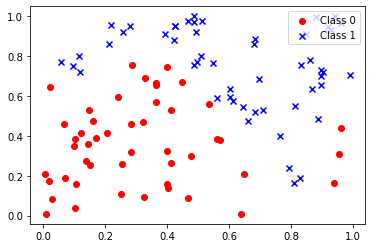

In [54]:
#c0_x,c0_y,c1_x,c1_y,data= data_generator(100)

l1 = plt.scatter(c0_x,c0_y, c="red", marker = 'o')
l2 = plt.scatter(c1_x,c1_y, c="blue", marker = 'x')
plt.legend((l1, l2), ('Class 0', 'Class 1'), scatterpoints=1,loc='upper right')

In [56]:

nodes = [2, 3,1]
weights = weights_list(nodes)
weights


[array([[0.10605841, 0.21180992, 0.92393515],
        [0.51284122, 0.0708185 , 0.38965788],
        [0.79177777, 0.2198471 , 0.28658233]]),
 array([[0.51546287, 0.13278529, 0.37403565, 0.85688324]])]

In [57]:
new_w = GD(data,weights, 0.1, 0.05, 2, 1000)
new_w

[array([[1.06534461e-01, 5.66105928e-53, 1.67689939e-53],
        [5.12659776e-01, 6.72339357e-53, 1.99158038e-53],
        [7.90041396e-01, 7.39431036e-53, 2.19031703e-53]]),
 array([[-5.37132636e-04, -3.07112120e-49, -3.64743612e-49,
         -4.01140687e-49]])]

In [58]:
train_e, train_matrix = cost_funct(data, weights, 1)
print('Error on training data:', '\n', train_e, '\n')
print('Error Confusion matrix:', '\n',train_matrix)

Error on training data: 
 0.9060390450104738 

Error Confusion matrix: 
 [[ 0.  0.]
 [48. 52.]]


In [59]:
training_e, training_matrix = cost_funct(data,new_w, 1)
print('Error on training data:', '\n', training_e, '\n')
print('Error Confusion matrix:', '\n',training_matrix)

Error on training data: 
 0.6931579592765996 

Error Confusion matrix: 
 [[48. 52.]
 [ 0.  0.]]


In [64]:
validation_data= data_generator_v(100)

In [65]:
error_validation, validation_matrix = cost_funct(validation_data, new_w,1)
print('validation error:', error_validation,'\n')
print('validation confusion matrix:','\n', validation_matrix)

validation error: 0.6930935033602728 

validation confusion matrix: 
 [[60. 40.]
 [ 0.  0.]]
